# ¿Como afecta el clima  a la cantidad de viajes que hay por dia?

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [73]:
weather = pd.read_csv('data/weather.csv',dtype={'zip_code': str})

In [74]:
trips = pd.read_csv('data/trip.csv')

stations = pd.read_csv('data/station.csv')

In [75]:
def splitDate(date):
    lineSplit = date.split('/')
    return str(lineSplit[2]) +\
        str(lineSplit[0] if int(lineSplit[0]) >= 10 else '0' + str(lineSplit[0])) + \
        str(lineSplit[1] if int(lineSplit[1]) >= 10 else '0' + str(lineSplit[1]) )

#### Tranformamos las fechas en un formato que sea mas facil de manejar

In [76]:
weather['date'] = weather['date'].apply(lambda x : pd.to_datetime(splitDate(x)))

In [77]:
trips['start_date'] = trips['start_date'].apply(lambda x : pd.to_datetime(splitDate(x.split(' ')[0])) )

In [78]:
weather['precipitation_inches'] = weather['precipitation_inches'].apply(lambda x : 0.005 if (x == 'T') else float(x))

weather = weather[weather.precipitation_inches.isnull() == False]

weather = weather.fillna(0)

weather['events'] = weather['events'].apply(lambda x : 'Normal' if x == 0 else x)
weather['events'] = weather['events'].apply(lambda x : 'Rain' if x == 'rain' else x)

#### Vamos a hacer un Join en el cual vamos a tener la duracion promedio de los viajes en un determinado dia, y ademas la cantidad de viajes en un dia

In [79]:
tripsWithReduceDuration = trips[(trips['duration'] < 10000) & (trips['duration'] > 60)]

In [80]:
tripsByDay = tripsWithReduceDuration[['start_date']]
tripsByDay.rename(columns={'start_date' : 'date'},inplace=True)

In [81]:
tripsByDay = tripsByDay.assign(tripsByDay = 1).groupby(by='date').sum()
tripsByDay = tripsByDay.reset_index()

In [82]:
durationTripsByDay = tripsWithReduceDuration[['start_date','duration']]
durationTripsByDay.rename(columns={'start_date' : 'date','duration' : 'durationByDay'},inplace=True)

In [83]:
durationTripsByDay = durationTripsByDay.groupby(by='date').mean().reset_index()

In [84]:
durationTripsByDay.sample(5)

,date,durationByDay
236,2014-04-22,570.508491
207,2014-03-24,648.180639
278,2014-06-03,633.240642
655,2015-06-15,586.153555
389,2014-09-22,644.533283


In [85]:
durationAndTripsByDay = pd.merge(tripsByDay,durationTripsByDay, on='date',how='left')
durationAndTripsByDay.sample()

,date,tripsByDay,durationByDay
163,2014-02-08,91,551.56044


In [86]:
dataMerge = pd.merge(durationAndTripsByDay, weather, on='date', how='left')
dataMerge.sample()

,date,tripsByDay,durationByDay,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
783,2014-02-01,359,968.356546,60.0,47.0,36.0,39.0,34.0,29.0,78.0,...,10.0,10.0,14.0,6.0,114.0,0.0,0.0,Normal,333.0,94041


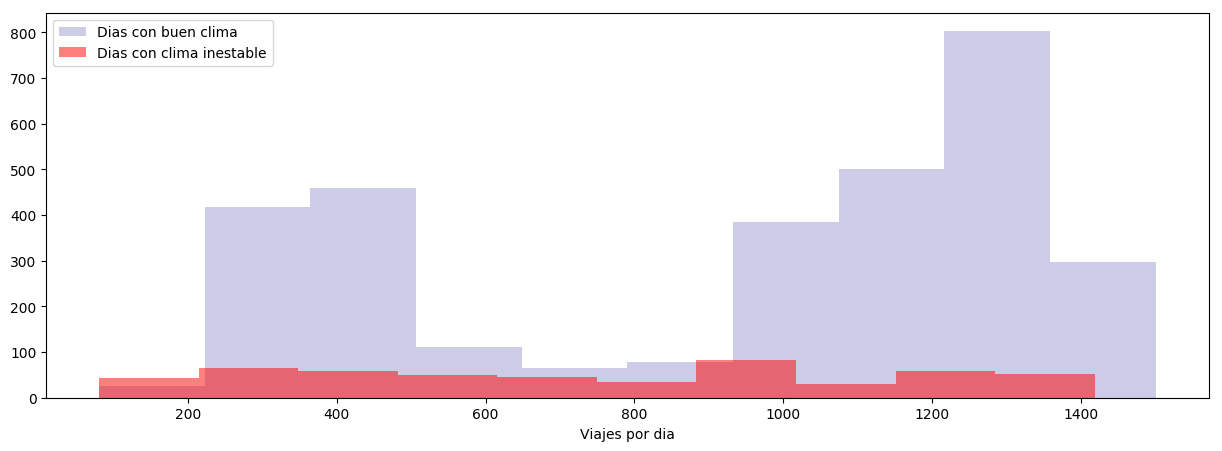

In [87]:
plt.hist(x=dataMerge[dataMerge['events'] == 'Normal']['tripsByDay'],color='darkblue',alpha=0.2)
plt.hist(x=dataMerge[dataMerge['events'] != 'Normal']['tripsByDay'],color='red',alpha=0.5)
plt.xlabel('Viajes por dia')
plt.legend(['Dias con buen clima','Dias con clima inestable'])

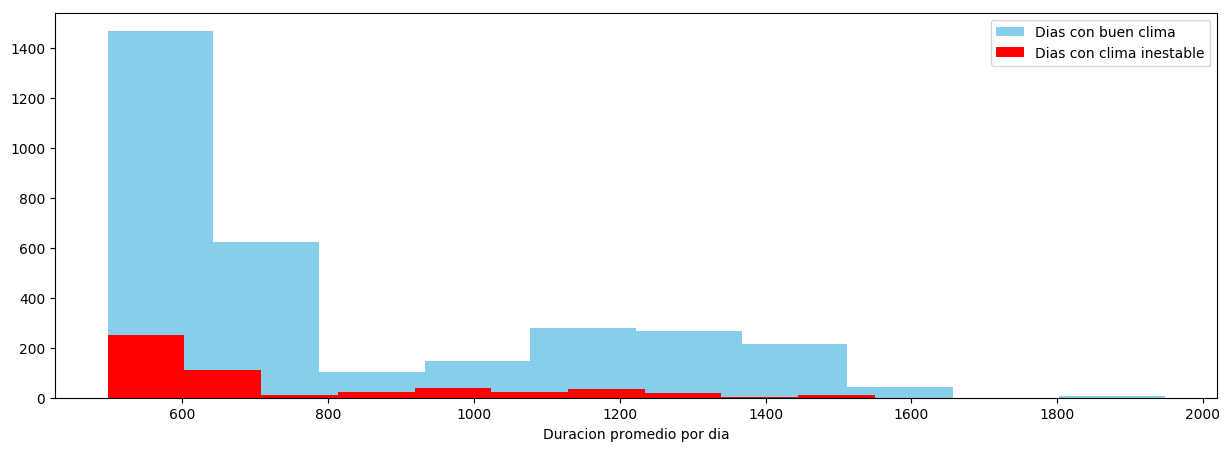

In [88]:
plt.hist(x=dataMerge[dataMerge['events'] == 'Normal']['durationByDay'],color='skyblue')
plt.hist(x=dataMerge[dataMerge['events'] != 'Normal']['durationByDay'],color='red')
plt.xlabel('Duracion promedio por dia')
plt.legend(['Dias con buen clima','Dias con clima inestable'])

In [89]:
plt.colors?

In [90]:
np.random.uniform(-0.4,0.4)

-0.03365969782993278

In [92]:
plt.rcParams['figure.figsize'] = (15, 5)

durationAndTripsByWeekDay = pd.DataFrame(dataMerge)
durationAndTripsByWeekDay['date'] = durationAndTripsByWeekDay['date'].apply(lambda x : (x.dayofweek) + np.random.uniform(-0.4,0.4))
durationAndTripsByWeekDay.sample()
#durationAndTripsByDay.plot(x='date',y=['durationByDay','tripsByDay'],legend=True,title='Cantidad de viajes y duracion por dia')

,date,tripsByDay,durationByDay,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
1135,5.609947,393,1244.020356,69.0,61.0,53.0,51.0,48.0,45.0,83.0,...,10.0,8.0,22.0,9.0,25.0,0.0,4.0,Normal,262.0,94107


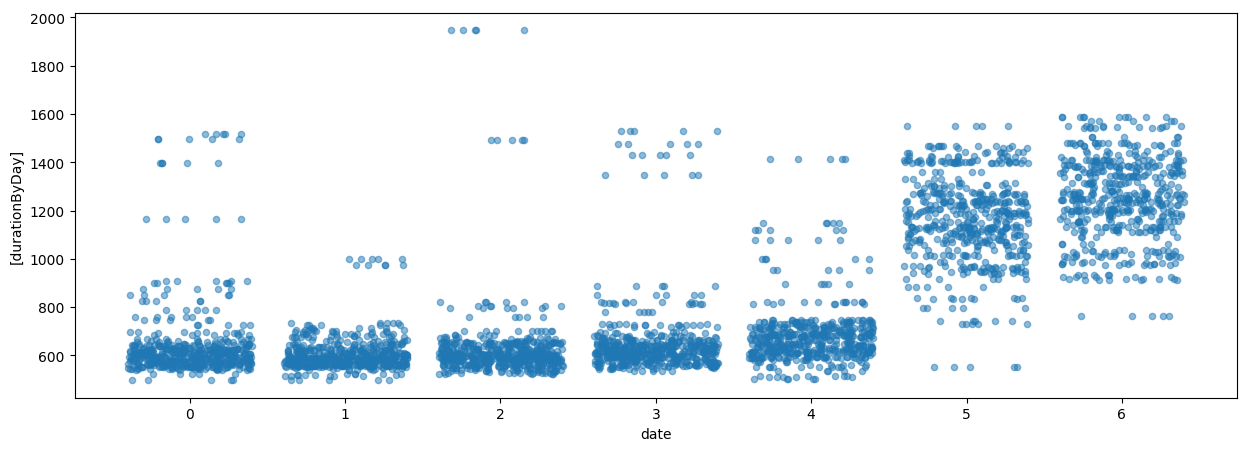

In [93]:
durationAndTripsByWeekDay.plot(kind='scatter',x='date',y=['durationByDay'],alpha=0.5)



In [ ]:
durationAndTripsByDay.loc[:,['tripsByDay','durationByDay']].corr().abs()

In [ ]:
fig, ax = plt.subplots(figsize=(3,2));        # Sample figsize in inches
cor = durationAndTripsByDay.loc[:,['tripsByDay','durationByDay']].corr().abs()
cor.values[[np.arange(2)]*2] = 0
sns.heatmap(cor,cmap='PuBu');

Se puede ver que la cantidad de viajes por dia y la duracion de los mismos, esta estrechamente relacionada, lo cual puede significar que estamos siendo victimas de la ecuacion mas peligrosa de la historia

### ¿Cual es la duracion habitual de los viajes en los feriados?


In [ ]:
help(weather.date.max())


In [ ]:
dataMergeDayOfWeek = pd.merge(durationAndTripsByDay, weather, on='date', how='left')
dataMergeDayOfWeek['date'] = dataMergeDayOfWeek['date'].apply(lambda x : x.dayofweek)
dataMergeByDay = dataMergeDayOfWeek.groupby(by='date').mean().reset_index()
dataMergeByDay.plot(kind='bar',x='date',y=['tripsByDay','durationByDay'])

In [ ]:
dataMerge = pd.merge(durationAndTripsByDay, weather, on='date', how='left')
dataMerge.plot(x='date',y=['tripsByDay','mean_temperature_f'],legend=False)

In [ ]:

dataMerge[dataMerge['duration'] > 10000]

# ¿Que paso estos dias en San Francisco?

In [ ]:
tripsJuneTwelve = trips[trips['start_date']==pd.to_datetime('2014-06-12')]
tripsJuneTwelve.sample()

In [ ]:
trips[trips['duration'] > 1000000]

In [ ]:
tripsJuneTwelve.plot(x='end_date',y=['duration'])

In [ ]:

dataMerge.sample()

In [ ]:
dataMerge.trips.isnull().sum()

In [ ]:
dataMerge.describe()

In [ ]:
# Relationship between columns
dataMerge.loc[:,['trips','duration','mean_temperature_f', 'mean_dew_point_f', 'mean_humidity', 'mean_sea_level_pressure_inches',\
                 'mean_visibility_miles', 'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',\
                 'cloud_cover']].corr()

In [ ]:
#'mean_temperature_f', 'mean_dew_point_f', 'mean_humidity', 'mean_sea_level_pressure_inches',
#'mean_visibility_miles', 'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches','cloud_cover'

In [ ]:
fig, ax = plt.subplots(figsize=(16,10));        # Sample figsize in inches
cor = dataMerge.loc[:,['trips','duration','mean_temperature_f', 'mean_dew_point_f', 'mean_humidity', 'mean_sea_level_pressure_inches',\
                 'mean_visibility_miles', 'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',\
                 'cloud_cover']]\
        .corr().abs()
cor.values[[np.arange(11)]*2] = 0
sns.heatmap(cor,cmap='PuBu');

In [ ]:
durationMean =  dataMerge.duration.max() 
dataMerge['duration'] = dataMerge['duration'].apply(lambda x : float(x)/float(durationMean))

temperatureMean = dataMerge.mean_temperature_f.max() 
dataMerge['mean_temperature_f'] = dataMerge['mean_temperature_f']\
                                .apply(lambda x : float(x)/float(temperatureMean))
#dataMerge['precipitation_inches'] = dataMerge['precipitation_inches']\
#                                .apply(lambda x : float(x)/float(dataMerge.precipitation_inches.max()))

In [ ]:
dataMerge.plot(x='date',y=['duration','mean_temperature_f'],title='Viajes vs Temperatura Media',legend=True)

Si bien el grafico no connota una correlacion directa entre la temperatura media y la cantidad de viajes, se puede apreciar que apartir de cierto pediodo, los graficos llegan a tener una correlacion mayor, como puede apreciarce a partir del año 2014 periodo 05 .

In [ ]:
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

In [ ]:
dataMerge[(dataMerge['date'].apply(lambda x : x.dayofweek) == 6) & (dataMerge['zip_code'] == 94107) ].shape

Cosas que faltan:

· Filtrar datos por Zona

· Filtrar datos por dia

    ·Sea laboral, no laboral o feriado

· Filtrar por epoca(mes, año, estaciones)


In [ ]:
weather.date.max()

# ¿Cuantos viajes hay en los dias feriados?

In [ ]:
weather[(pd.to_datetime(weather['date']) > pd.datetime(2014,1,1)) & (pd.to_datetime(weather['date']) < pd.datetime(2015,1,1)) & (weather['zip_code'] == '94107')].sample(1)

In [ ]:
weather.plot?